In [1]:
from src.functions import *

**Problema 1**: Em sistemas termodinâmicos, a distribuição de Boltzmann descreve a probabilidade
de encontrar um sistema em um estado específico com energia $E$. Este conceito é fundamental para
entender fenômenos como equilíbrio térmico e a distribuição de partículas em diferentes níveis de
energia. Considere a distribuição de Boltzmann para o problema do oscilador harmônico *clássico*:

$$
P(x) \propto e^{-\beta E(x)}, \text{ com } E(x) = \frac{1}{2} kx^2,
$$

onde $β = 1/k_BT$ , $k_B$ é a constante de Boltzmann e $T$ é a temperatura. Sob estas condições, a
distribuição de equilíbrio para a coordenada $x$ é gaussiana, com média zero e variância $\sigma = \frac{1}{\beta k}$.


**(a)** Gere valores aleatórios de $x$ a partir de uma distribuição uniforme e aceite-os com probabilidade
proporcional a $P (x)$ (método de rejeição). Assim, obtém-se uma amostra de valores de $x$ que
devem refletir a distribuição de Boltzmann. 


**(b)** Crie um histograma dos valores simulados de $x$ e normalize-o para estimar a densidade de probabilidade empírica. 

**(c)** Sobreponha a curva teórica da distribuição de Boltzmann, dada por:

$$
P_{teórica} (x) = \sqrt{\frac{\beta k}{2\pi}} exp(-\frac{\beta k x^2}{2})
$$

**(d)** Calcule a média e a variância da amostra obtida e compare com os valores teóricos:

$$
\mathbb{E}[x] = 0, Var(x) = \frac{1}{\beta k} .
$$

**(e)** Realize os testes estatísticos de Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quan-
titativamente se as amostras são consistentes com a distribuição teórica. 

(**f**) Crie um Q-Q plot
para fornecer uma ferramenta visual adicional de comparação entre a distribuição empírica e a distribuição teórica. Dessa forma, além da inspeção visual (histograma e curva teórica), a média, a variância, bem como testes estatísticos e o Q-Q plot, fornecerão evidências quantitativas e gráficas da qualidade da aproximação Monte Carlo à solução analítica

## **Item (a)**

In [ ]:
# Item (a) <---------------
# Determina largura da gaussiana
b = 10
a = -b
n_samples = 10**7
M = 50
# Retorna lista de valores aceitos

samples = rejection_sampling(n_samples, a, b, M, P, g)
print('Amostras aceitas para distribuição de Boltzmann (Rejection samples)')
#print(samples)

## **Item (b)**

In [ ]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
k_data, Pk_data = distribution_data(samples, a, b, m)
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann empírico", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão1/RejectionEmpirico.pdf")
plt.show()

## **Item (c)**

In [ ]:
Pk_teo = [P_teorica(i) for i in k_data]
# Visualizar os resultados
m = 50 # número de bins na distribuição
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Amostras", color='green')
plt.plot(k_data, Pk_teo, label='P(k) teórico', mfc = "None", mec = "#00019a", linewidth=2.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Rejection Sampling da Distribuição de Boltzmann teórico", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão1/RejectionTeorico.pdf")
plt.show()

## **Item (d)**

In [ ]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = 0.0 # Valor esperado teórico
var_teo = 1 / beta * k # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E:.5f}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E:.5f}')
print(f'var_medido = {var:.5f}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var:.5f}')

## **Item (e)**

In [ ]:
ks_stat, ks_p_value = ks_2samp(Pk_teo, Pk_data)

# Normalizar as listas, caso não sejam proporções ou probabilidades (soma = 1)
Pk_teo_norm = [x / sum(Pk_teo) for x in Pk_teo]
Pk_data_norm = [x / sum(Pk_data) for x in Pk_data]

# Aplicar o teste chi-quadrado
chi2_stat, chi2_p_value = chisquare(f_obs=Pk_teo_norm, f_exp=Pk_data_norm)

# Resultados com mais casas decimais
print(f"Estatística qui-quadrado: {chi2_stat:.10f}")
print(f"Valor-p: {chi2_p_value:.10f}")  # 10 casas decimais

# Resultados com mais casas decimais
print(f"Estatística KS: {ks_stat:.10f}")
print(f"KS_Valor-p: {ks_p_value:.10f}")  # 10 casas decimais

# Interpretação dos resultados
alpha = 0.05  # Nível de significância

# Teste KS
if ks_p_value < alpha:
    print("KS Test: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("KS Test: Não rejeitamos H0. As distribuições podem ser iguais.")

# Teste Qui-Quadrado
if chi2_p_value < alpha:
    print("Qui-Quadrado: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.")

## **Item (f)**

In [ ]:
# Item (c) - Plot do Histograma <---------------
Pk_teo = [P_teorica(i) for i in k_data]
# Visualizar os resultados
#x = np.linspace(-a, a, 1000)
fig = plt.subplots(figsize=(16, 9))
plt.plot(k_data, Pk_data, 'o', label='P(k) empírico', mfc = "None", mec = "red", ms=14, mew=1.4)
plt.plot(k_data, Pk_teo, label='P(k) teórico', mfc = "None", color = "#00019a", linewidth=2.4)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')

plt.text(x=1.7, y=.32, s=rf"p_value KS = {ks_p_value:.8f}", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor='blue', edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))
plt.text(x=1.7, y=.28, s=rf"p_value chi = {chi2_p_value:.8f}", fontsize=19, fontweight="bold", 
        color="black",bbox=dict(facecolor='red', edgecolor="black", boxstyle="round,pad=0.2", alpha=.1))

plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Distribuições teórica e empírica para Boltzmann", size=22)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão1/Q-Q_plot.pdf")
plt.show()

**Problema 2:** Sistemas biestáveis, como reações químicas em equilíbrio ou certos tipos de circuitos biológicos, frequentemente apersentam potenciais com múltiplos mínimos. Um exemplo clássico é o potencial

$$
V(x) = x^4 - 4x^2
$$

que possui dois mínimos estáveis e uma barreira entre eles. A dinâmica de uma partícula sujeita a este potencial, na presença de ruído térmico, pode ser descrita pela *equação de Langevin*, tipicamente escrita na forma unidimensional como:

$$
\frac{dx}{dt} = \frac{1}{\gamma} \frac{dV}{dx} + η(t),
$$

onde $\gamma$ é o coeficiente de amortecimento e $\eta(t)$ é um ruído Gaussiano com média zero e correlação ⟨$\eta(t)\eta(t')$⟩ $ = 2D\gamma(t − t′)$.

**(a)** Mostre que *no equilíbrio*, a distribuição de probabilidade estacionária da posição da partícula é a distribuição de Boltzmann:

$$
P_{eq}(x) \sim e^{−βV(x)} ,
$$

com $\beta = 1/k_BT$.

**(b)** Ao invés de tentar resolver a equação de Langevin diretametne, utilize o algoritmo de *Metropolis* para simular um comportamento estatístico para simular o comporatamento estatístico da partícla neste potencial. Escolha uma posição inicial aleatória $x_0$. A cada passo, proponha uma nova posição
$$
x_{nova} = x + \Delta x,
$$
onde $\Delta x$ é um passo aletório, por exemplo, gerado a partir de uma distribuição uniforme ou normal. Calcule a variação do potencial:

$$
\Delta V = V(x_{nova}) - V(x)
$$
onde $V(x)$ é dado pela Eq. (1). A nova posição $x_{nova}$ é aceita com probabilidade:
$$
P = min(1,e^{\beta \Delta V}).
$$

Caso não seja aceita, a posição permanece em x. Plote a posição como função do tempo $t$.

**(c)** Compare as distribuições estacionárias obtidas pela solução do estacionário e o histograma resultante das simulações do algoritmo de Metropolis e verifique que a distribuição das posições obtida pelo Monte Carlo coincide com a distribuição de Boltzmann resultante da dinâmica de Langevin.

**(d)** Realize longas simulações de Monte Carlo e calcule a probabilidade de encontrarmos a partícula na vizinhança dos mínimos do potencial V(x) como função de temperatura $\beta$

### **Item (b)**

In [ ]:
# Parâmetros fixos
beta = 1.0       # Inverso da temperatura (1/k_B T)
x0 = 0.0         # Posição inicial
delta = .9      # Amplitude máxima do passo aleatório

# Valores diferentes de steps
step_values = [100, 1000, 10000, 100000]

# Configuração do plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # Para acessar os eixos facilmente em um loop

# Simulação e plotagem para cada número de steps
for i, steps in enumerate(step_values):
    positions = metropolis(V, x0, beta, steps, delta)
    time = np.arange(steps + 1)
    
    # Plot no subplot correspondente
    axes[i].plot(time, positions, color='blue', label=f'Steps = {steps}')
    axes[i].set_xlabel('Tempo (t)', fontsize=15)
    axes[i].set_ylabel('Posição ($x$)', fontsize=15)
    axes[i].set_title(f'Trajetória $x(t)$ para Steps = {steps}', fontsize=15)
    axes[i].tick_params('both', width=1.4, length=10, labelsize=14, direction='in')

# Ajustar layout
plt.tight_layout()
plt.savefig("results/Questão2/metropolis.pdf")
plt.show()

### **Item (c)**

In [ ]:

beta = 1.0       # Inverso da temperatura (1/k_B T)
x0 = 0.0         # Posição inicial
delta = 0.5      # Amplitude máxima do passo aleatório
steps = 10**7

positions =  metropolis(V, x0, beta, steps, delta)
# Histograma
hist, bins = np.histogram(positions, bins=150, density=True)
bin_centers = (bins[:-1] + bins[1:]) / 2


# Normalizar o histograma para obter uma curva de densidade
hist_density = hist / trapezoid(hist, bin_centers)

# Distribuição teórica
x = np.linspace(-3, 3, 500)
P_theoretical = np.exp(-beta * V(x))
P_theoretical /= trapezoid(P_theoretical, x)

# Plot
fig = plt.subplots(figsize=(16, 9))
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), alpha=0.7, label="Empírico", color="green")
plt.plot(bin_centers, hist_density, label="P(k) Empírico", color="blue", linewidth=2.5)
plt.plot(x, P_theoretical, 'o', label='P(k) teórico', mfc = "None", mec = "red", ms=14, mew=1.8)
#plt.plot(x, P(x) / sum(P(x)), label="Distribuição alvo (não normalizada)", color='red')
#plt.plot(samples, P(samples) / sum(P(samples)), label="Distribuição alvo (não normalizada)", color='red')
plt.legend(prop={"size": 22},  framealpha=0.0)
plt.xlabel(r"$x$", size=25)
plt.ylabel(r"$P(x)$", size=25)
plt.title("Distribuição de distâncias por Metropolis", size=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão2/Distri_dist.pdf")
plt.show()

## **Item (d)**

In [ ]:
# Encontrar os mínimos do potencial
minimos = [-np.sqrt(2), np.sqrt(2)]  # Obtido analiticamente

# Função para calcular a probabilidade nos mínimos usando amostras
def probabilidade_minimo_amostras(positions, minimo, delta=0.5):
    """
    Calcula a probabilidade de a partícula estar em torno de um mínimo específico
    usando as amostras geradas pelo algoritmo de Metropolis.
    
    Parâmetros:
        positions (np.array): Posições da partícula ao longo do tempo.
        minimo (float): Posição do mínimo do potencial.
        delta (float): Tamanho da região ao redor do mínimo.
    
    Retorna:
        probabilidade (float): Probabilidade estimada.
    """
    return np.sum((positions > minimo - delta) & (positions < minimo + delta)) / len(positions)

# Aviso, com steps = 10⁷ demorou cerca de 120min para rodar, caso queira diminuir tempo de execução dimiunir para 10⁶

# Parâmetros da simulação
β0, βF, N = 0.1, 3.0, 300
β = np.linspace(β0, βF, N)
x0 = 0.0  # Posição inicial
delta = 0.5  # Amplitude máxima do passo aleatório
steps = 10**7  # Número de passos na simulação

# Armazenar as probabilidades
probabilidades_minimos = {m: [] for m in minimos}

# Simulação para diferentes valores de beta
for beta in β:
    positions = metropolis(V, x0, beta, steps, delta)  # Simular com Metropolis
    for minimo in minimos:
        prob = probabilidade_minimo_amostras(positions, minimo, delta=0.5)
        probabilidades_minimos[minimo].append(prob)

In [ ]:
# Plotar os resultados
plt.figure(figsize=(19, 8))
for minimo, probs in probabilidades_minimos.items():
    if (minimo < 0):
        plt.plot(β, probs, linewidth=1.8, label=fr'Mínimo em $x = -\sqrt{{2}}$')
    else:
        plt.plot(β, probs, linewidth = 1.8, label=fr'Mínimo em $x = \sqrt{{2}}$')


plt.title('Probabilidade nos Mínimos em Função de $\\beta$', fontsize=25)
plt.xlabel(r'$\beta$ (Inverso da Temperatura)', size=25)
plt.ylabel('Probabilidade no Mínimo', fontsize=20)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.savefig("results/Questão2/minimum_vs_beta.pdf")
plt.show()

## **Extra**

In [ ]:
# Parâmetros da simulação
betas = [0.1, 1.0, 2.0, 3.0, 4.0]  # Inverso da temperatura
x0 = 0.0  # Posição inicial
delta = 1.0  # Amplitude máxima do passo
steps = 10**6  # Número de passos

# Configuração do plot 2x2
fig, ax = plt.subplots(figsize=(16, 12))

colors = ["#03AC13", "#00019a", "#fe0000", "orange", "darkslateblue"]
# Simulação e plotagem para cada beta
for i, beta in enumerate(betas):
    # Simular com Metropolis
    positions = metropolis(V, x0, beta, steps, delta)
    
    # Histograma empírico
    hist, bins = np.histogram(positions, bins=100, density=True)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    
    # Distribuição teórica
    x = np.linspace(-3, 3, 500)
    P_theoretical = np.exp(-beta * V(x))
    norm_term = sum([p for p in P_theoretical])
    P_theoretical = [p / norm_term for p in P_theoretical]

    # Plotar no subplot correspondente
    ax.plot(x, P_theoretical, label=rf"$\beta$ = {beta}", color=colors[i], linewidth=2.4)
    ax.set_title(rf"Distribuição para múltiplos $\beta$", fontsize=25)
    ax.set_xlabel(r"$x$", fontsize=20)
    ax.set_ylabel(r"$P(x)$", fontsize=20)
    ax.tick_params('both', width=1.8, length=15, labelsize=19, direction='in')
    #ax.legend(fontsize=12)
    
# Ajustar layout e salvar o gráfico
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.savefig("results/Questão2/Distri_multi_beta.pdf")
plt.show()

**Problema 3**: A constante de Stefan-Boltzman, $\sigma$, relaciona a energia total emitida por um corpo negro com a sua temperatura. Ela é dada por

$$
\sigma=\frac{\pi^2k_b^4}{60\hbar^3c^2}\zeta(4),
$$
onde $\zeta(s)$ é função zeta de Riemann. A função zeta de Riemann pode ser expressa na forma na forma integral:
$$
\zeta(s)=\frac{1}{\Gamma(s)}\int_0^{\infty}\frac{x^{s-1}e^{-x}}{1-e^{-x}}dx,
$$
onde $\Gamma(s)=(s-1)!$ é a função Gamma. Utilizando *importance sampling*, gere amostras aleatórias de $x$ de uma distribuição exponencial, $\omega(x)=e^{-x}$ para $x\ge0$, que corresponde ao termo $e^{-x}$ no integrando. Reescreva a integral como
$$
\zeta(s)=\frac{1}{\Gamma(s)}\mathbb{E}\left[\frac{x^{s-1}}{1-e^{-x}}dx\right].
$$
Compare seu resultado de Monte Carlo com o valor exato:
$$
\zeta(4)=\frac{\pi^4}{90}.
$$

In [2]:
# Exemplo de uso da função
N = 1000000  # Número de iterações
s = 4  # Valor de s
resultado = direct_zeta(N, s)
resultado

1.0806112116848943

Diferença do valor exato

In [3]:
Zetta_teorico=np.pi**4/90
Delta_zetta=Zetta_teorico-resultado
percent_Delta_zetta=Delta_zetta*100
print(f'diferença do valor teórico e do obtido={percent_Delta_zetta:.3f}%')

diferença do valor teórico e do obtido=0.171%


**Problema 4**: Considere a integral de uma função $f(\boldsymbol{x})$ em um espaço de $d$ dimensões. A integral pode ser expressa como:
$$
    I = \int_{[0,1]^d} f(\boldsymbol{x})d\boldsymbol{x}.
$$

**(a)**: Utilize Monte Carlo para estimar a integral acima. Gere N vetores $\boldsymbol{x}$ com componentes uniformemente distribuídas no intervalo $[0,1]$ para $d = 1$ e $f(\boldsymbol{x}) = e^{-|\boldsymbol{x}|^2}$.

**(b)**: Para diferentes valores de $d$ ($d = 2,6,10$), estude como o número de amostras $N$ necessário para alcançar a precisão desejada varia com a dimensionalidade.

**(c)**: Calcule o erro padrão da média para cada caso e analise a taxa de convergência.

### **Item (a)**

In [4]:
#d=1 é a dimensão
d=1
N = 100000  # Número de amostras
I=(0.746824)**d
resultado = integral_I(N, d)
print(f"Valor aproximado da integral: {resultado} para d={d}")
print(f"valor teórico: {I}")
diferenca = abs((resultado - I) / I) * 100
print(f"Diferença do valor real: {diferenca:0.3f}%")

Valor aproximado da integral: 0.7472782459959944 para d=1
valor teórico: 0.746824
Diferença do valor real: 0.061%


### **Item (b)**

In [5]:
# Dimensões e números de amostras
dimensoes = [2, 6, 10]
amostras = [100, 1000, 10000, 100000,1000000]

# Criar uma lista para armazenar os resultados
resultados = []
for N in amostras:
    for d in dimensoes:
        I = (0.746824) ** d  # Valor teórico
        resultado = integral_I(N, d)  # Chamada da função
        diferenca = abs((resultado - I) / I) * 100  # Diferença percentual
        # Armazenar os dados como uma linha
        resultados.append({
            "Dimensão (d)": d,
            "Amostras (N)": N,
            "Diferença (%)": diferenca
        })

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

# Exibir a tabela
print(df_resultados)

# Opcional: salvar a tabela em um arquivo CSV
df_resultados.to_csv("resultados_integral.csv", index=False)


    Dimensão (d)  Amostras (N)  Diferença (%)
0              2           100       1.747406
1              6           100       4.381714
2             10           100       1.055395
3              2          1000       1.181263
4              6          1000       0.804602
5             10          1000       2.541867
6              2         10000       0.276248
7              6         10000       0.736299
8             10         10000       0.930888
9              2        100000       0.212625
10             6        100000       0.373676
11            10        100000       0.313408
12             2       1000000       0.011815
13             6       1000000       0.030528
14            10       1000000       0.074201


### **Item (c)**

In [6]:
# Função para calcular erro padrão da média e a taxa de convergência
def convergence_rate(d, N_samples_list):
    """
    Calcula o erro padrão da média e taxa de convergência para diferentes números de amostras.
    
    Args:
        d (int): Dimensão da integral.
        N_samples_list (list of int): Lista com o número de amostras.
    
    Returns:
        tuple: Lista de erros padrão da média e taxas de convergência.
    """
    errors = []
    for N in N_samples_list:
        estimates = [integral_I(N, d) for _ in range(10)]  # Média em 10 execuções
        error_std = np.std(estimates)                                # Erro padrão
        errors.append(error_std)
    
    # Calcula a taxa de convergência: log-log slope
    log_N = np.log(N_samples_list)
    log_errors = np.log(errors)
    slope = np.polyfit(log_N, log_errors, 1)[0]  # Coeficiente angular da reta
    return errors, slope

# Parâmetros
dimensions = [2, 6, 10]
N_samples_list = [10**i for i in range(2,7)]  # Amostras variando de 10^2 a 10^6


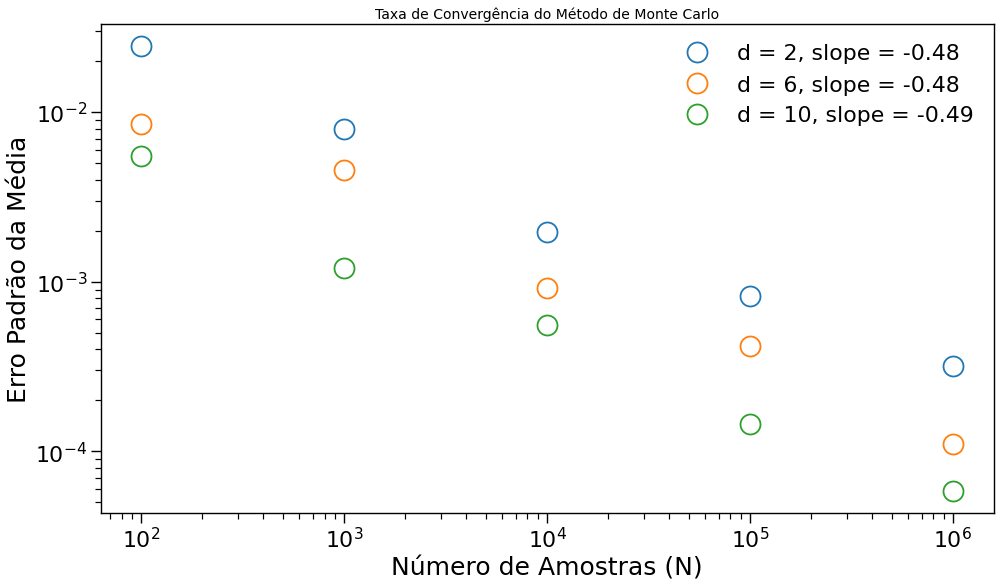

In [7]:
# Plotagem
plt.figure(figsize=(16, 9))
for d in dimensions:
    errors, slope = convergence_rate(d, N_samples_list)
    plt.plot(N_samples_list, errors, 'o', label=f'd = {d}, slope = {slope:.2f}', mfc="None", ms=20, mew=1.8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Número de Amostras (N)', size=25)
plt.ylabel('Erro Padrão da Média', size=25)

# Configurações dos ticks
plt.tick_params('both', which='major', width=1.4, length=10, labelsize=22)  # Major ticks
plt.tick_params('both', which='minor', width=1.2, length=6, labelsize=18)   # Minor ticks
plt.minorticks_on()  # Ativa os minor ticks

plt.title('Taxa de Convergência do Método de Monte Carlo', fontsize=14)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.show()


**Problema 5**: Em física de partículas, distribuições angulares podem descrever a probabilidade de observação de partículas em diferentes direções após colisões de alta energia. Como exemplo, considere a reação de aniquilação entre elétron e um pósitron para formar um par de múons ($\mu^+\mu^-$). A probabilidade de observar um múon em um determinado ângulo $\theta$ (medido a partir da direção do elétron incidente) é proporcional a:

$$
    P(\theta) \propto 1 + cos^2(\theta), \quad \text{com} \quad 0 \le \theta \le \pi.
$$

Sob essas condições, o problema propõe a geração de amostras do ângulo $\theta$ cuja distribuição segue a função de probabilidade acima usando métodos de Monte Carlo.

**(a)**: Normalize a distribuição de probabilidades $P(\theta)$, determinando o fator de normalização.

**(b)** Implemente um método de amostragem para gerar valores de $\theta$ que sigam $P(cos(\theta))$ utilizando métodos de Monte Carlo por rejeição, ou seja, sorteie ângulos $\theta$ uniformemente distribuídos em $[0, \pi]$. Assim, gere números aleatórios uniformes para decidir se cada $\theta$ proposto é aceito com base em sua probabilidade relativa $1 + cos^2(\theta)$.

**(c)** Crie um histograma dos valores de $\theta$ obtidos e compare com a distribuição teórica $P(\theta)$. Compare seu resultado com a Figura \ref{reference}.

**(d)** Calcule a média e a variância das amostras obtidas e compare com os valores teóricos para a distribuição normalizada.

**(e)** Realize testes estatísticos como Kolmogorov-Smirnov (K-S) e qui-quadrado para avaliar quantitativamente se as amostras obtidas são consistentes com a distribuição teórica.

### **Item (a)** Este item está feito no pdf

### **Item (b)** 

In [8]:
n_samples = 10**6
M = 50
a=-1 
b=1

#Retorna lista de valores aceitos
#Foram sorteados valores uniformementes entre (-1,1) que é o equivalente de sortear entre (cos(0),cos(\pi)
samples = rejection_sampling(n_samples, a, b, M, Pcos, g)


print(r'Amostras aceitas para distribuição $P(cos(\theta))$ (Rejection samples)')


Amostras aceitas para distribuição $P(cos(\theta))$ (Rejection samples)


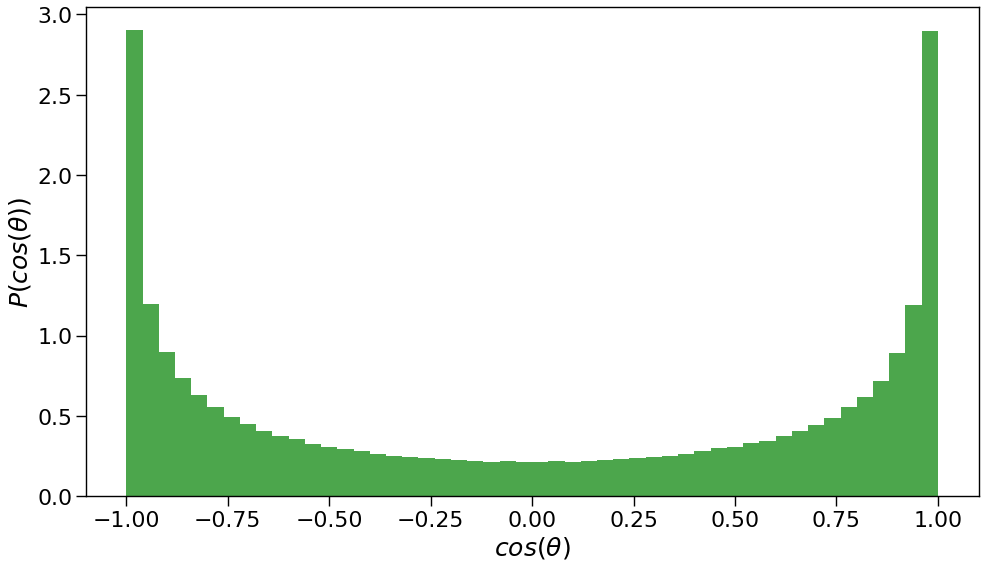

In [9]:
# Item (b) - Plot do Histograma <---------------
m = 200 # número de bins na distribuição
# x_aceito e p(x_aceito) empíricos
#Este resultado não está normalizado

fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.xlabel(r"$cos(\theta)$", size=25)
plt.ylabel(r"$P(cos(\theta))$", size=25)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão5/RejectionEmpiricopcos.pdf")
plt.show()

### **Item (c)** 

In [10]:
n_samples = 10**6
M = 100
a=0 
b=np.pi

# Retorna lista de valores aceitos
samples = rejection_sampling(n_samples, a, b, M, Ptheta, g)

print(r'Amostras aceitas para distribuição $P(\theta)$ (Rejection samples)')
#print(samples)

Amostras aceitas para distribuição $P(\theta)$ (Rejection samples)


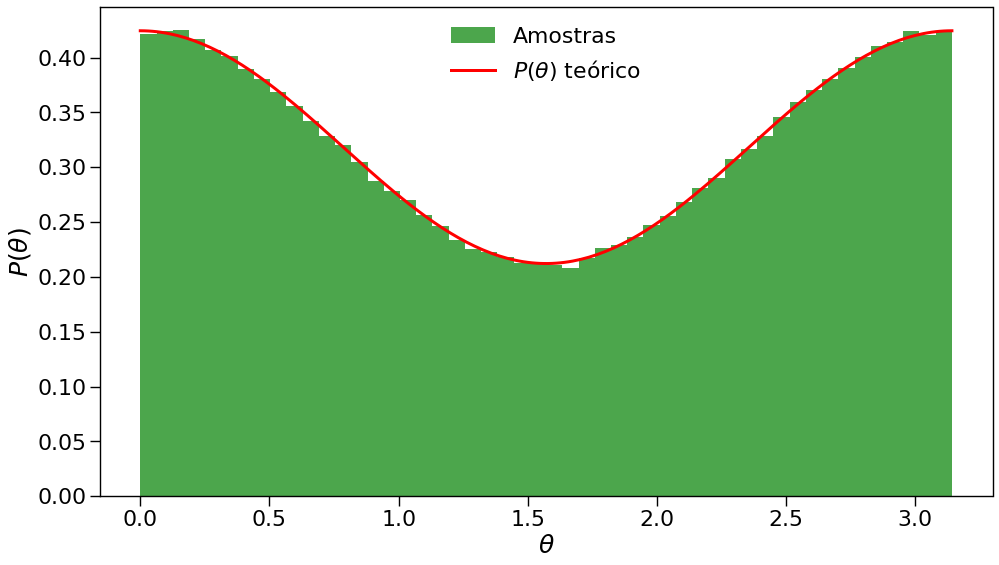

In [11]:
theta_teo= np.linspace(0, np.pi, 200)
Ptheta_teo = [Ptheta(i) for i in theta_teo]
fig = plt.subplots(figsize=(16, 9))
plt.hist(samples, bins=50, density=True, alpha=0.7, label="Amostras", color='green')
plt.plot(theta_teo, Ptheta_teo, label=r'$P(\theta)$ teórico', mfc = "None", color = "red", linewidth=3)
plt.legend(prop={"size": 22}, fancybox=True, framealpha=0.0)
plt.xlabel(r"$\theta$", size=25)
plt.ylabel(r"$P(\theta)$", size=25)
plt.tick_params('both', width=1.4, length=10, labelsize=22)
plt.savefig("results/Questão5/RejectionEmpiricoP.pdf")
plt.show()

### **Item (d)** 

In [12]:
E = np.mean(samples) # Valor esperado das amostras (média)
var = np.var(samples) # Variância das amostras

E_teo = np.pi/2 # Valor esperado teórico
var_teo = (2/(3*np.pi))*(((np.pi)**3)/3+(np.pi**3)/6)-(np.pi/2)**2 # Variância teórica

Err_E = abs(E - E_teo)
Err_var = abs(var - var_teo)

print(f'E_medido = {E}, E_teórico = {E_teo}, Erro_Absoluto = {Err_E}')
print(f'var_medido = {var}, var_teórico = {var_teo}, Erro_Absoluto = {Err_var}')

E_medido = 1.5713575442605225, E_teórico = 1.5707963267948966, Erro_Absoluto = 0.000561217465625985
var_medido = 0.9903499468134876, var_teórico = 0.8224670334241133, Erro_Absoluto = 0.16788291338937433


### **Item (e)** 

In [13]:
# Ordenar amostras
x_sorted = np.sort(samples)
x_min=0
x_max=np.pi

m = 200 # número de bins na distribuição

# Construir a CDF 
x_theoretical = np.linspace(x_min, x_max, len(x_sorted))
cdf_theoretical = np.cumsum(Ptheta(x_theoretical)) / np.sum(Ptheta(x_theoretical))

ks_stat, ks_p_value = kstest(x_sorted, lambda v: np.interp(v, x_theoretical, cdf_theoretical))


theta_data,Ptheta_data=distribution_data(samples, a, b, m)
theta_teo= np.linspace(0, np.pi, len(theta_data))
Ptheta_teo = [Ptheta(i) for i in theta_teo]

# Normalizar as listas, caso não sejam proporções ou probabilidades (soma = 1)
Ptheta_teo_norm = [x / sum(Ptheta_teo) for x in Ptheta_teo]
Ptheta_data_norm = [x / sum(Ptheta_data) for x in Ptheta_data]

# Aplicar o teste chi-quadrado
chi2_stat, chi2_p_value = chisquare(f_obs=Ptheta_teo_norm, f_exp=Ptheta_data_norm)

# Resultados com mais casas decimais
print(f"Estatística KS: {ks_stat:.10f}")
print(f"KS_Valor-p: {ks_p_value:.10f}")  # 10 casas decimais

# Resultados com mais casas decimais
print(f"Estatística qui-quadrado: {chi2_stat:.10f}")
print(f"Valor-p: {chi2_p_value:.10f}")  # 10 casas decimais

# Interpretação dos resultados
alpha = 0.05  # Nível de significância

# Teste KS
if ks_p_value < alpha:
    print("KS Test: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("KS Test: Não rejeitamos H0. As distribuições podem ser iguais.")

# Teste Qui-Quadrado
if chi2_p_value < alpha:
    print("Qui-Quadrado: Rejeitamos H0. As distribuições são diferentes.")
else:
    print("Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.")

Estatística KS: 0.0009353862
KS_Valor-p: 0.3455480805
Estatística qui-quadrado: 0.0002285891
Valor-p: 1.0000000000
KS Test: Não rejeitamos H0. As distribuições podem ser iguais.
Qui-Quadrado: Não rejeitamos H0. As distribuições podem ser iguais.
